In [1]:
import xarray
import zarr
import s3fs

In [4]:
# Initilize the S3 file system
s3 = s3fs.S3FileSystem(client_kwargs={"endpoint_url": "http://localhost:9000"},key="test", secret="testtesttest1")
latest_arome_arctic = s3.ls("/aromearctic")[0]
latest_arome_arctic

'aromearctic/20201110T1000Z'

In [5]:
s3_path = 's3://' + latest_arome_arctic
store = s3fs.S3Map(root=s3_path, s3=s3, check=False)
ds_zarr = xarray.open_zarr(store=store)

In [6]:
%%time
ds_dars = xarray.open_dataset(
        "http://localhost:8080/data/arome_arctic_pp_2_5km_latest.nc",
        decode_times=False,
)
ds_dars.to_netcdf("/tmp/arctic_from_dars.nc")

CPU times: user 40.5 s, sys: 6.76 s, total: 47.3 s
Wall time: 1min 4s


In [7]:
%%time

ds_zarr.to_netcdf("/tmp/arctic_from_zarr.nc")

CPU times: user 39 s, sys: 5.49 s, total: 44.5 s
Wall time: 57.5 s


In [23]:
p = ds_zarr["air_temperature_2m"]

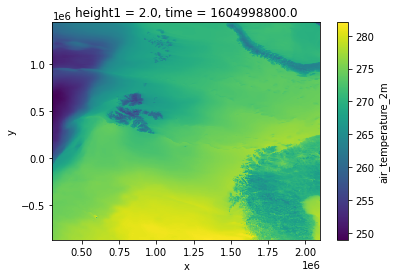

In [24]:
p[0].plot()